In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np

VPRM_old_or_new = "new"
run_ID = "VPRM_"+VPRM_old_or_new+"_optimized_params_diff_evo_V2_100"

base_path = "/home/madse/Downloads/Fluxnet_Data/all_tuned_params/" + run_ID

folders = [
    f
    for f in os.listdir(base_path)
    if os.path.isdir(os.path.join(base_path, f))
]
flx_folders = [folder for folder in folders if folder.startswith("FLX_")]

if not flx_folders:
    print("Warning - There is no input data")
    raise SystemExit(0)

df_parameters = pd.DataFrame()


# Loop through each FLX_ folder and append data from XLSX files
for folder in flx_folders:
    folder_path = os.path.join(base_path, folder)
    files = [f for f in os.listdir(folder_path) if f.endswith(VPRM_old_or_new+'_diff_evo_V2_100.xlsx')]
    for file in files:
        file_path = os.path.join(folder_path, file)
        data = pd.read_excel(file_path)
        df_parameters = pd.concat([df_parameters, data], axis=0)

# List of tuples containing site_ID and Year values to drop
values_to_drop = [
    ("NL-Hor", 2006),
    ("NL-Hor", 2011),
    ("OT-Ro2", 2009),
    ("IT-Ro1", 2000),
    ("IT-Ro1", 2007),
    ("IT-Noe", 2004),
    ("IT-Noe", 2011),
    ("IT-Col", 2003),
    ("IT-Col", 2004),
    ("IT-Col", 2006),
    ("IT-CA3", 2011),
    ("IT-CA2", 2011),
    ("IT-CA1", 2011),
    ("FR-Gri", 2004),
    ("FI-Let", 2009),
    ("FI-Jok", 2003),
    ("ES-LJu", 2004),
    ("ES-LgS", 2009),
    ("ES-Amo", 2007),
    ("ES-Amo", 2008),
    ("DK-Sor", 2014),
    ("DK-Eng", 2005),
    ("DE-Zrk", 2013),
    ("DE-Spw", 2010),
    ("DE-Spw", 2013),
    ("DE-Seh", 2007),
    ("DE-Seh", 2010),
    ("DE-Spw", 2010),
    ("DE-Spw", 2013),
    ("DE-Seh", 2007),
    ("DE-Seh", 2010),
    ("DE-RuS", 2011),
    ("DE-RuS", 2012),
    ("DE-RuR", 2011),
    ("DE-Kli", 2004),
    ("DE-Kli", 2009),
    ("DE-Akm", 2009),
    ("DE-Akm", 2011),
    ("DE-Akm", 2012),
    ("DE-Akm", 2014),
    ("CZ-BK2", 2006),
    ("CZ-BK2", 2007),
    ("CZ-BK2", 2008),
    ("DE-Akm", 2009),
#Alps
    ("BE-Bra", 2003),
    ("CH-Cha", 2009),
    ("CH-Cha", 2005),
    ("CH-Dav", 2005),
    ("CH-Fru", 2005),
    ("CH-Fru", 2006),
    ("CH-Lae", 2004),
    ("CZ-wet", 2006),
    ("DE-Lkb", 2009),
    ("DE-Lkb", 2010),
    ("DE-Lkb", 2013),
    ("DE-SfN", 2012),
    ("IT-La2", 2000),
    ("IT-La2", 2002),
    ("IT-PT1", 2002),
    ("IT-Ren", 2004),
    ("IT-Ren", 2001),
    ("IT-Ren", 2000),
    ("IT-Tor", 2008)
]

df_parameters['site_year'] = df_parameters['site_ID'] + '_' + df_parameters['Year'].astype(str)
for site_year in set(df_parameters['site_year']).intersection(set('_'.join(map(str, tpl)) for tpl in values_to_drop)):
    df_parameters = df_parameters[df_parameters['site_year'] != site_year]
df_parameters.drop(columns=['site_year'], inplace=True)

# Create a new column by concatenating site_ID and PFT
df_parameters['new_site_ID'] = df_parameters['site_ID'] + '_' + df_parameters['PFT']
df_parameters['site_ID'] = df_parameters['new_site_ID']
df_parameters.drop(columns=['new_site_ID'], inplace=True)


In [77]:
#df_parameters = df_parameters.drop(df_parameters[df_parameters["R2_NEE"] < 0].index)
# df_parameters.reset_index(drop=True, inplace=True)
df_parameters = df_parameters[df_parameters["R2_NEE"] >= 0]

In [78]:
df_parameters.reset_index(drop=True, inplace=True)
print(df_parameters)

        site_ID  PFT  Year       Topt        PAR0      beta     lambd  \
0    IT-Isp_DBF  DBF  2013  25.216413  181.935906  0.509261  0.010000   
1    IT-Isp_DBF  DBF  2014  24.337324  140.104000  0.584570  0.010000   
2    CH-Cha_GRA  GRA  2006  15.792314  339.713217  1.000000  0.010000   
3    CH-Cha_GRA  GRA  2007  14.998919  292.288466  1.000000  0.500323   
4    CH-Cha_GRA  GRA  2008  10.992214  360.666205  1.000000  2.855027   
..          ...  ...   ...        ...         ...       ...       ...   
122  IT-Tor_GRA  GRA  2010   9.853795  339.092609  1.000000  0.049743   
123  IT-Tor_GRA  GRA  2011  12.526773  347.552893  1.000000  0.010000   
124  IT-Tor_GRA  GRA  2012  11.228490  270.670957  0.995926  0.355243   
125  IT-Tor_GRA  GRA  2013   5.400543  388.363513  1.000000  0.882081   
126  IT-Tor_GRA  GRA  2014   6.258853  317.472240  1.000000  0.010000   

        T_crit    T_mult    alpha1  ...   R2_Reco    R2_NEE  RMSE_GPP  \
0    10.676943  0.000000  0.301612  ...  0.353099 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

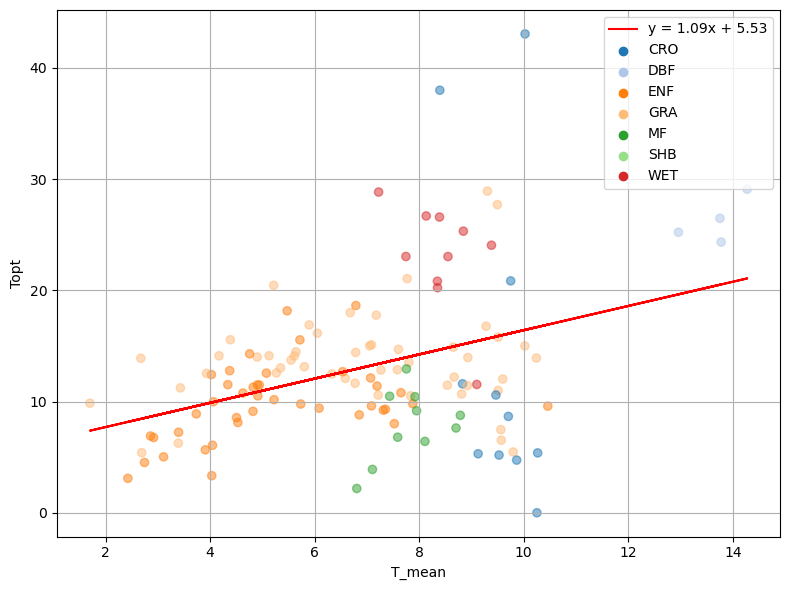

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Define color palette
color_palette = sns.color_palette('tab20')

# Map PFT values to colors using the color palette
pft_colors = {'CRO': color_palette[0], 'DBF': color_palette[1], 'ENF': color_palette[2],
              'GRA': color_palette[3], 'MF': color_palette[4], 'SHB': color_palette[5],
              'WET': color_palette[6]}

# Scatterplot
plt.figure(figsize=(8, 6))

# Scatterplot with colored points
plt.scatter(df_parameters["T_mean"], df_parameters["Topt"], alpha=0.5, c=df_parameters["PFT"].map(pft_colors))

# Linear regression
coefficients = np.polyfit(df_parameters["T_mean"], df_parameters["Topt"], 1)
poly = np.poly1d(coefficients)
plt.plot(df_parameters["T_mean"], poly(df_parameters["T_mean"]), color='red', label=f'y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}')

# Normal line
#normal_line = np.linspace(df_parameters["T_mean"].min(), df_parameters["T_mean"].max(), 100)
#plt.plot(normal_line, normal_line, color='blue', linestyle='--', label='y = x')

# Equation of the lines
equation_regression = f'y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}'
equation_normal = 'y = x'
# plt.legend()
# plt.text(0.05, 0.95, equation_regression, fontsize=10, color='red', transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.5'))
# plt.text(0.05, 0.85, equation_normal, fontsize=10, color='blue', transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.5'))

# Plot labels and grid
# plt.title("Scatterplot of T_mean vs Topt with Linear Regression and Normal Line")
plt.xlabel("T_mean")
plt.ylabel("Topt")
plt.grid(True)

# Add legend for PFT colors
for pft, color in pft_colors.items():
    plt.scatter([], [], c=color, label=pft)  # Create an empty scatter plot for each PFT label

plt.legend()

plt.tight_layout()
plt.savefig(
    base_path 
    + "/regression_Topt_vs_Tmean_"
    + VPRM_old_or_new
    + "_"
    + run_ID
    + ".eps",
    dpi=300,
    bbox_inches="tight",
)


In [80]:
if VPRM_old_or_new == "new":
    parameters_to_plot = [
        "Topt",
        "PAR0",
        "lambd",
        "alpha1",
        "alpha2",
        "beta",
        "T_crit",
        "T_mult",
        "gamma",
        "theta1",
        "theta2",
        "theta3",
    ]
else:
    parameters_to_plot = [
        "Topt",
        "PAR0",
        "lambd",
        "alpha",
        "beta",
    ]


/home/madse/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/madse/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/madse/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 23.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/madse/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/madse/miniconda3/lib/python3.10/site-packages/seaborn/categori

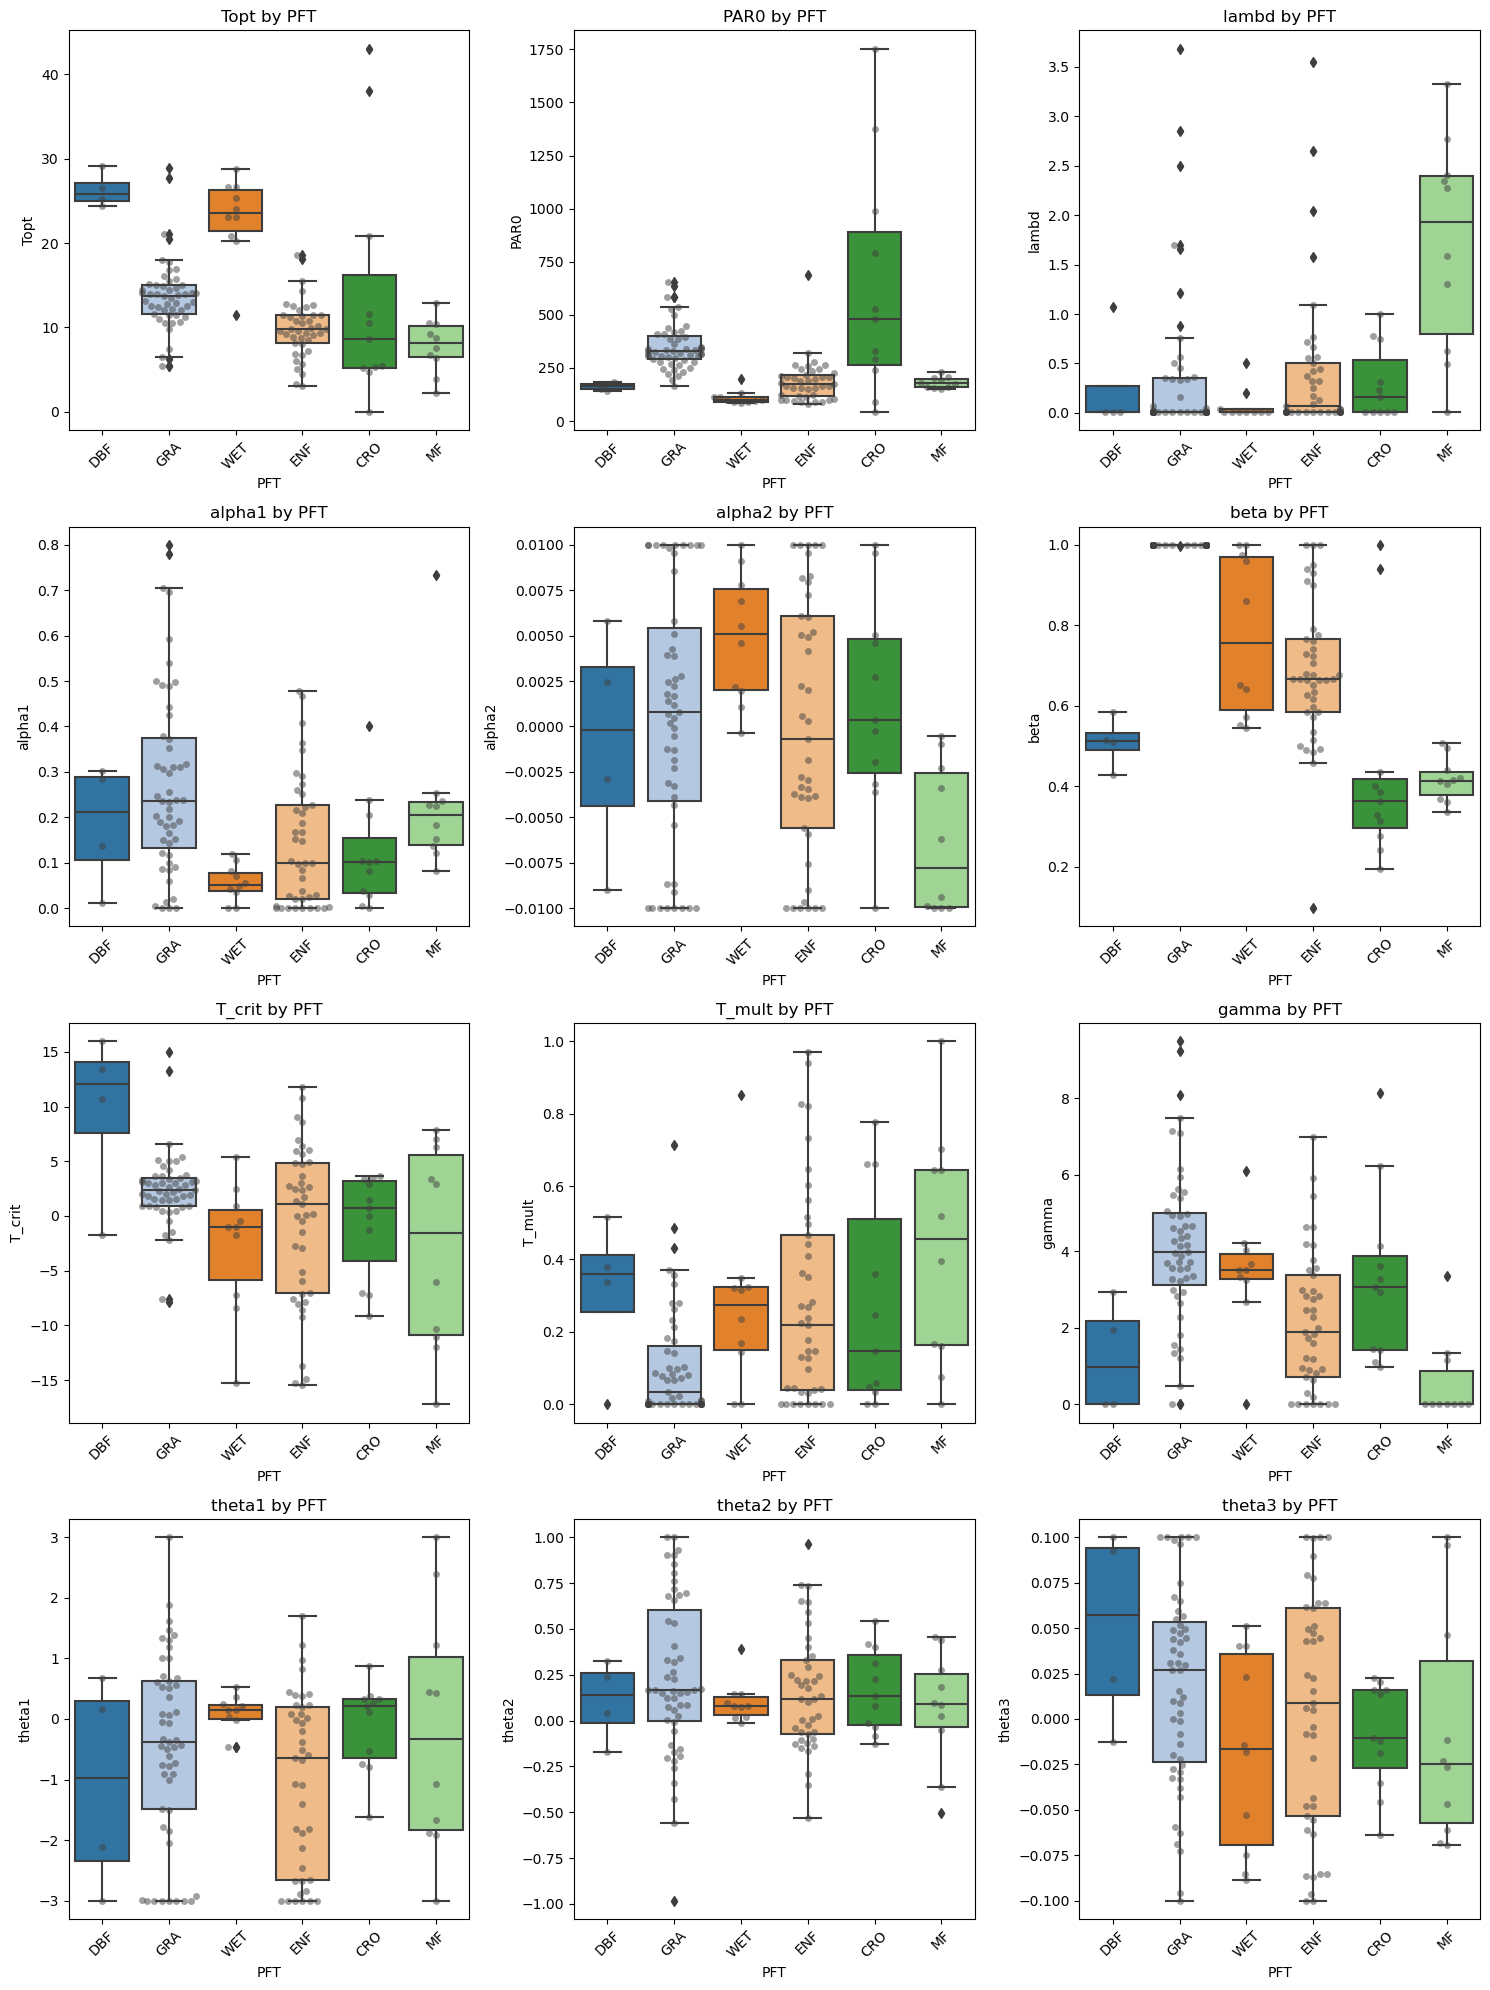

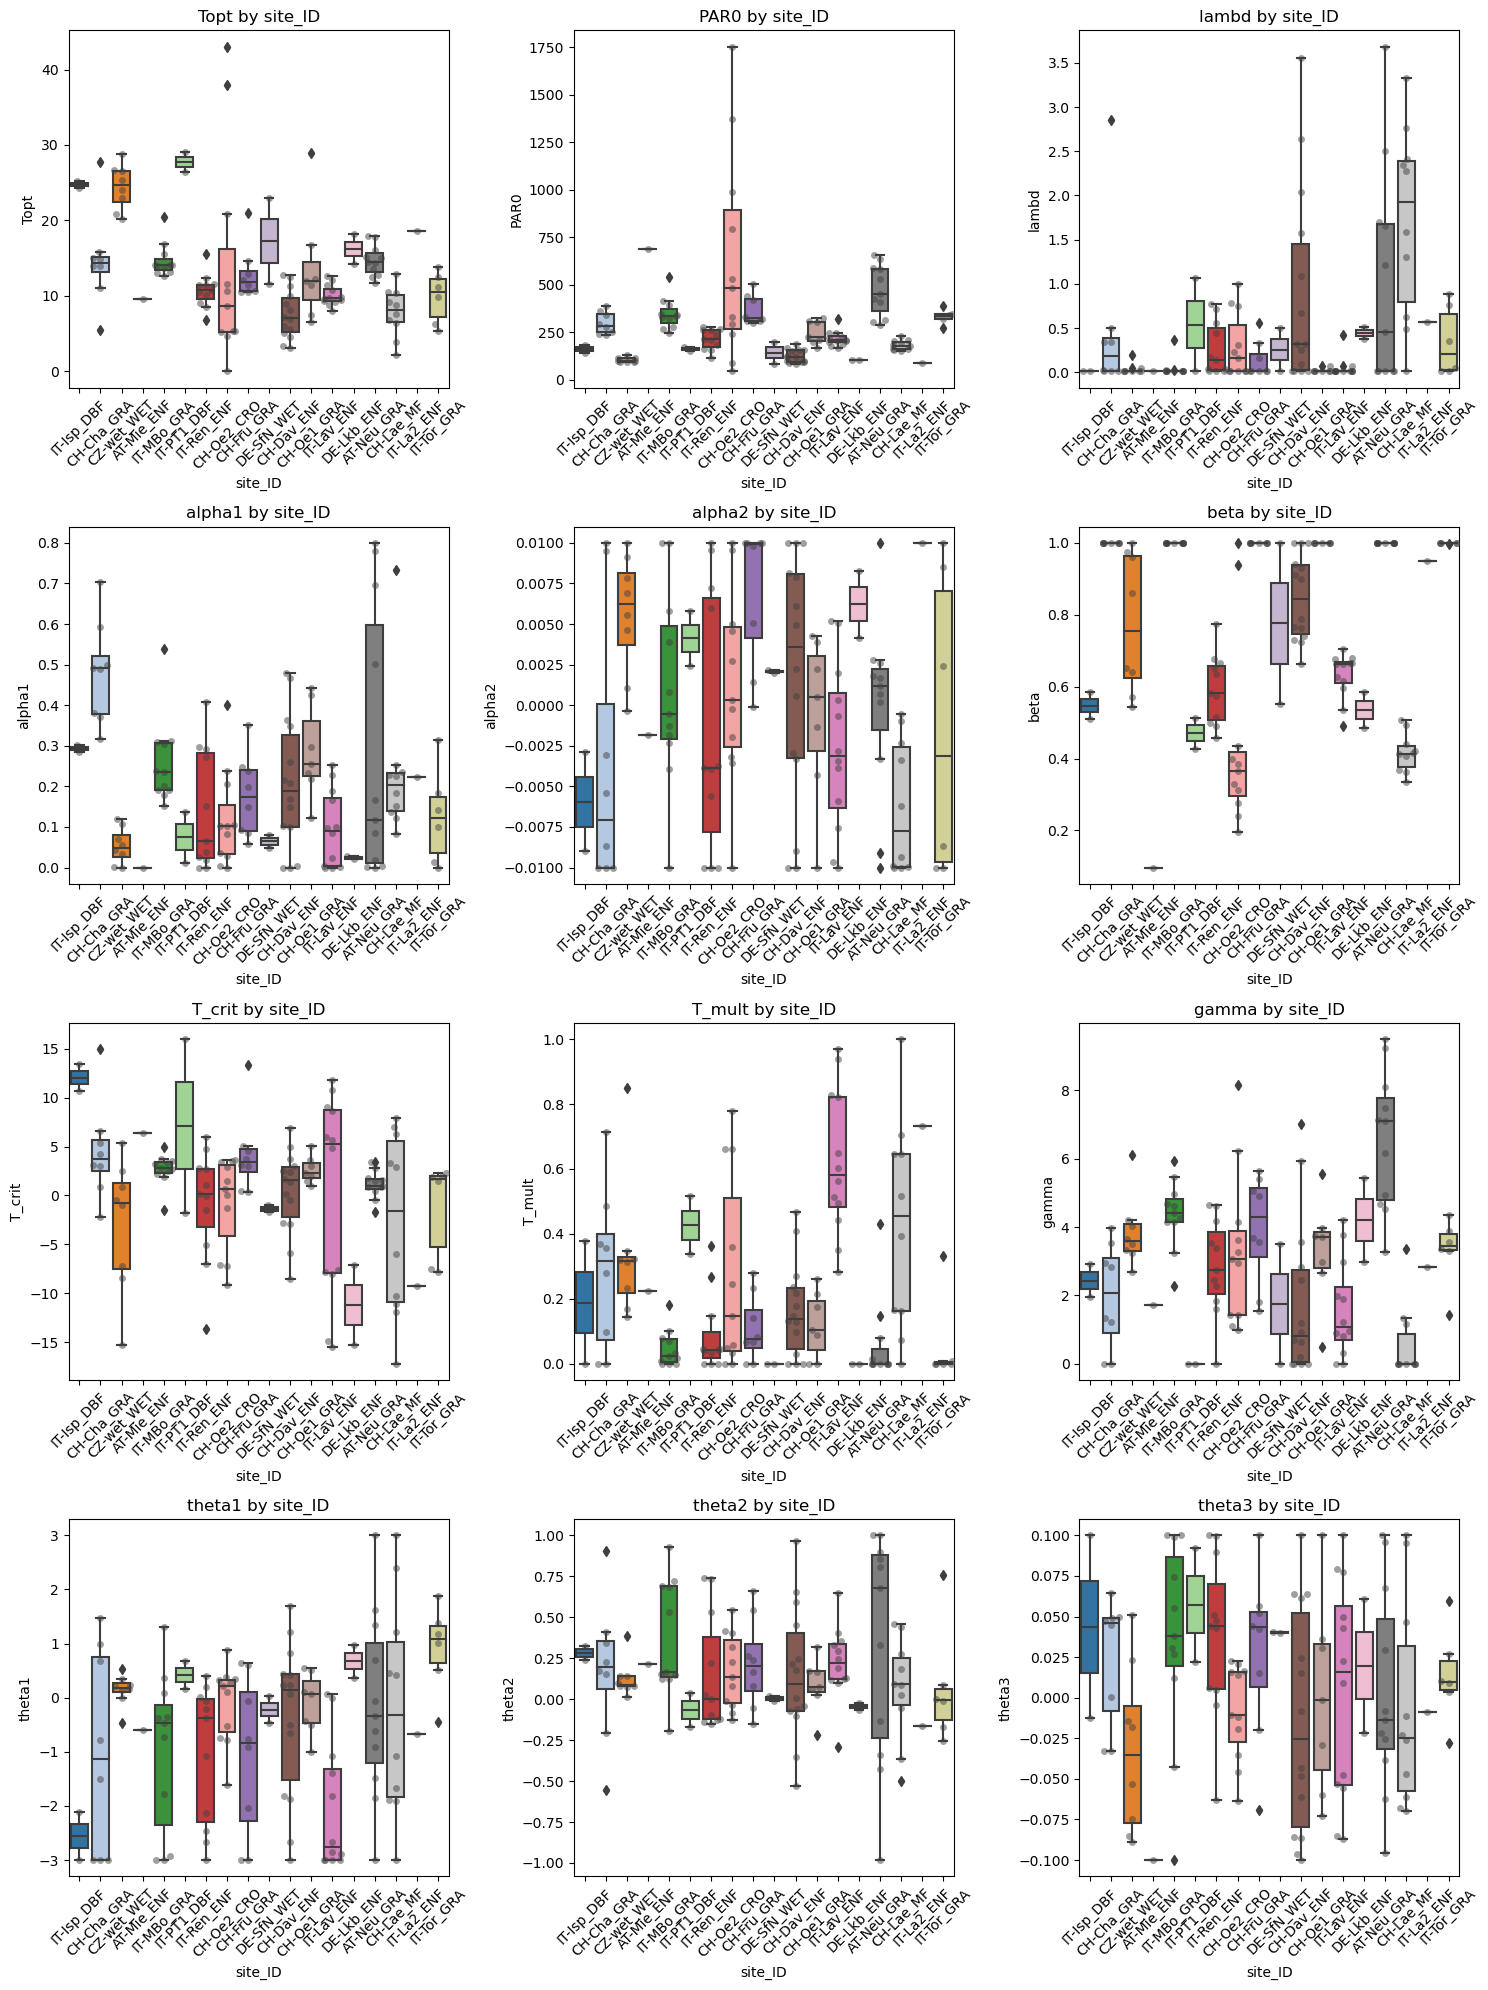

In [81]:

color_palette = 'tab20'  # 'muted', 'deep', 'husl'
sns.set_palette(color_palette)

if VPRM_old_or_new == "new":
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
else:
    fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 30))

axes = axes.flatten()


for i, parameter in enumerate(parameters_to_plot):
    sns.boxplot(x='PFT', y=parameter, data=df_parameters, ax=axes[i])
    sns.swarmplot(x='PFT', y=parameter, data=df_parameters, color="0.25", alpha=0.5, ax=axes[i])
    axes[i].set_title(f'{parameter} by PFT')
    axes[i].set_xlabel('PFT')
    axes[i].set_ylabel(parameter)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig(
    base_path 
    + "/boxplot_PFTs_"
    + VPRM_old_or_new
    + "_"
    + run_ID
    + ".eps",
    dpi=300,
    bbox_inches="tight",
)

if VPRM_old_or_new == "new":
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
else:
    fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 30))
    
axes = axes.flatten()

for i, parameter in enumerate(parameters_to_plot):
    sns.boxplot(x='site_ID', y=parameter, data=df_parameters, ax=axes[i])
    sns.swarmplot(x='site_ID', y=parameter, data=df_parameters, color="0.25", alpha=0.5, ax=axes[i])
    axes[i].set_title(f'{parameter} by site_ID')
    axes[i].set_xlabel('site_ID')
    axes[i].set_ylabel(parameter)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig(
    base_path +
    "/boxplot_siteIDs_"
    + VPRM_old_or_new
    + "_"
    + run_ID
    + ".eps",
    dpi=300,
    bbox_inches="tight",
)
plt.show()




In [82]:
grouped = df_parameters.groupby('PFT')
dfs_to_concat = []
for parameter in parameters_to_plot:
    for pft, group_data in grouped:
        mean = group_data[parameter].mean()
        median = group_data[parameter].median()
        # Create a DataFrame with the new row
        new_row = pd.DataFrame({'PFT': [pft], 'Parameter': [parameter], 'Mean': [mean], 'Median': [median]})
        # Append the new DataFrame to the list
        dfs_to_concat.append(new_row)

mean_median_df = pd.concat(dfs_to_concat, ignore_index=True)
mean_median_df.to_excel(base_path + "/mean_median_params_"+ VPRM_old_or_new+ "_"+run_ID+".xlsx", index=False)

In [83]:

# Pivoting the DataFrame
pivoted_mean = mean_median_df.pivot(index='Parameter', columns='PFT', values='Mean')
pivoted_median = mean_median_df.pivot(index='Parameter', columns='PFT', values='Median')

# Exporting to CSV
pivoted_mean.to_csv(base_path + "/parameters_mean_"+ VPRM_old_or_new+ "_"+run_ID+".csv")
pivoted_median.to_csv(base_path + "/parameters_median_"+ VPRM_old_or_new+ "_"+run_ID+".csv")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

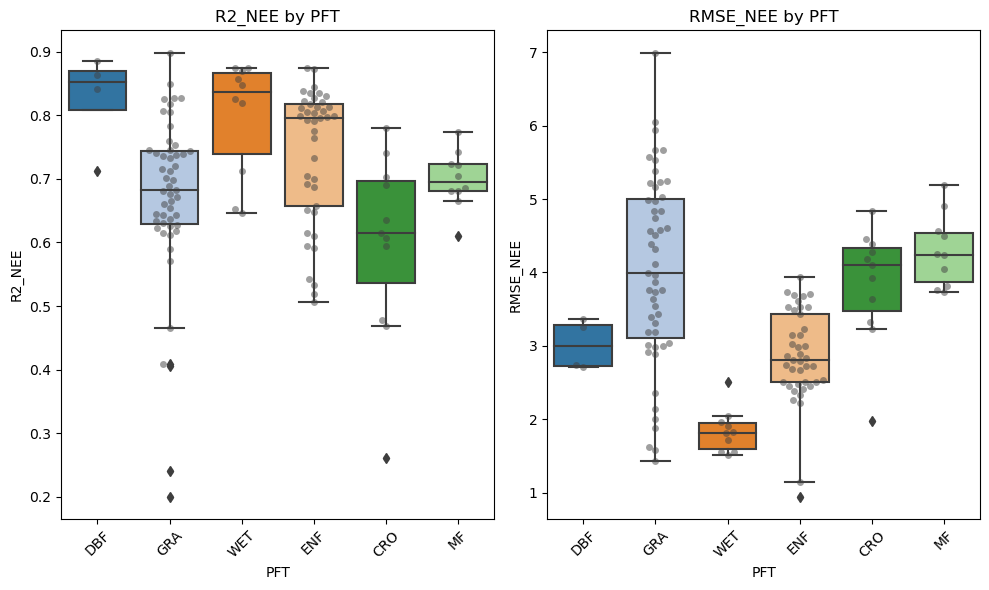

In [84]:

parameters_to_plot = ['R2_GPP', 'R2_Reco', 'R2_NEE', 'RMSE_GPP', 'RMSE_Reco', 'RMSE_NEE']

grouped = df_parameters.groupby('PFT')
dfs_to_concat = []
for parameter in parameters_to_plot:
    for pft, group_data in grouped:
        mean = group_data[parameter].mean()
        median = group_data[parameter].median()
        # Create a DataFrame with the new row
        new_row = pd.DataFrame({'PFT': [pft], 'Parameter': [parameter], 'Mean': [mean], 'Median': [median]})
        # Append the new DataFrame to the list
        dfs_to_concat.append(new_row)

mean_median_df = pd.concat(dfs_to_concat, ignore_index=True)
mean_median_df.to_excel(base_path + "/mean_median_R2_RMSE_"+ VPRM_old_or_new+ "_"+run_ID+".xlsx", index=False)

parameters_to_plot = [ 'R2_NEE', 'RMSE_NEE']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
axes = axes.flatten()

for i, parameter in enumerate(parameters_to_plot):
    sns.boxplot(x='PFT', y=parameter, data=df_parameters, ax=axes[i])
    sns.swarmplot(x='PFT', y=parameter, data=df_parameters, color="0.25", alpha=0.5, ax=axes[i])
    axes[i].set_title(f'{parameter} by PFT')
    axes[i].set_xlabel('PFT')
    axes[i].set_ylabel(parameter)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig(
    base_path +
    "/boxplot_R2_RMSE_"
    + VPRM_old_or_new
    + "_"
    + run_ID
    + ".eps",
    dpi=300,
    bbox_inches="tight",
)

In [85]:
# try to plot colors according to PFT
# import seaborn as sns
# import matplotlib.pyplot as plt

# color_palette = 'tab20'  # 'muted', 'deep', 'husl'
# sns.set_palette(color_palette)

# if VPRM_old_or_new == "new":
#     fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
# else:
#     fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 30))

# axes = axes.flatten()

# # Create a list to store legend handles and labels
# legend_handles = []

# for i, parameter in enumerate(parameters_to_plot):
#     sns.boxplot(x='PFT', y=parameter, data=df_parameters, ax=axes[i])
#     sns.swarmplot(x='PFT', y=parameter, data=df_parameters, color="0.25", alpha=0.5, ax=axes[i], dodge=True)
#     axes[i].set_title(f'{parameter} by PFT')
#     axes[i].set_xlabel('PFT')
#     axes[i].set_ylabel(parameter)
#     axes[i].tick_params(axis='x', rotation=45)
    
#     # Add handles and labels for legend
#     handles, labels = axes[i].get_legend_handles_labels()
#     legend_handles.extend(handles)

# plt.tight_layout(rect=[0, 0.05, 1, 1])  # Adjust layout to accommodate legend below all the tiles

# plt.savefig(
#     base_path 
#     + "/boxplot_PFTs_"
#     + VPRM_old_or_new
#     + "_"
#     + run_ID
#     + ".eps",
#     dpi=300,
#     bbox_inches="tight",
# )

# if VPRM_old_or_new == "new":
#     fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
# else:
#     fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 30))

# axes = axes.flatten()

# for i, parameter in enumerate(parameters_to_plot):
#     sns.boxplot(x='site_ID', y=parameter, data=df_parameters, hue='PFT', palette=color_palette, ax=axes[i])
#     sns.swarmplot(x='site_ID', y=parameter, data=df_parameters, hue='PFT', palette=color_palette, alpha=0, dodge=True, ax=axes[i])
#     axes[i].set_title(f'{parameter} by site_ID')
#     axes[i].set_xlabel('site_ID')
#     axes[i].set_ylabel(parameter)
#     axes[i].tick_params(axis='x', rotation=45)
# fig.legend(legend_handles, labels, loc='lower center', ncol=len(set(df_parameters['PFT'])), bbox_to_anchor=(0.5, -0.05))
# plt.tight_layout()

# plt.savefig(
#     base_path +
#     "/boxplot_siteIDs_"
#     + VPRM_old_or_new
#     + "_"
#     + run_ID
#     + ".eps",
#     dpi=300,
#     bbox_inches="tight",
# )
# plt.show()


In [86]:
# if VPRM_old_or_new == "new":
#     fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
# else:
#     fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 30))  

# axes = axes.flatten()

# mean_median_df = pd.DataFrame(columns=['Parameter', 'Mean', 'Median'])

# for i, parameter in enumerate(parameters_to_plot):
#     q_low = df_parameters[parameter].quantile(0.05)
#     q_high = df_parameters[parameter].quantile(0.95)
#     filtered_data = df_parameters[(df_parameters[parameter] >= q_low) & (df_parameters[parameter] <= q_high)]
#     sns.boxplot(x='PFT', y=parameter, data=filtered_data, ax=axes[i])
#     sns.swarmplot(x='PFT', y=parameter, data=filtered_data, color="0.25", alpha=0.5, ax=axes[i])
#     axes[i].set_title(f'{parameter} by PFT')
#     axes[i].set_xlabel('PFT')
#     axes[i].set_ylabel(parameter)
#     axes[i].tick_params(axis='x', rotation=45)
    
# plt.tight_layout()
# plt.savefig(base_path + "/boxplot_PFTs_filtered_with_median_"+run_ID+".eps", dpi=300, bbox_inches="tight")
# plt.show()
